### **Desafío guiado - Regresión desde la econometría**

### **`Descripción`**

En la empresa en la cual te encuentras contratado, te solicitan trabajar con un registro de clientes de un banco e información sobre su salud financiera. La base contenida en el csv `Credit` abarca las siguientes variables:

-	`Income`: Ingreso anual disponible en miles de dólares.
-	`Limit`: Límite del crédito.
-	`Rating`: Ranking del crédito.
-	`Cards`: Cantidad de tarjetas de crédito.
-	`Age`: Edad del usuario.
-	`Education`: Años de educación del usuario.
-	`Gender`: ¿Hombre o mujer?
-	`Student`: ¿Es estudiante?
-	`Married`: ¿Está casado?
-	`Ethnicity`: Etnicidad del usuario (Caucásico, Afroamericano, Asiático)
-	`Balance`: Promedio de deuda en tarjeta de crédito de usuario.

El objetivo que persigue el trabajo con esta base de datos es **conocer los determinantes de la variación en el promedio de deuda en tarjeta de crédito**. Para ello se te solicita generar modelos econométricos para inspeccionar los efectos de distintos atributos a partir de requerimientos que serán detallados más adelante.

### **`Importar librerias y cargar archivo csv`**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

# evitar warnings y deprecaciones 
import warnings 
warnings.filterwarnings(action="ignore")

from calidad_datos import calidad_datos
#from graficos import cross_plot

plt.style.use('seaborn') # gráficos estilo seaborn 
plt.rcParams["figure.figsize"] = (8,6) # Tamaño gráficos 
plt.rcParams["figure.dpi"] = 70 # resolución gráficos

In [2]:
import os
os.listdir()

['01_Desafío_guiado_-_Regresión_desde_la_econometría.ipynb',
 '01_Desafío_guiado_-_Regresión_desde_la_econometría.pdf',
 'calidad_datos.py',
 'Credit.csv',
 'FS - Desafío - Regresión desde la econometría.ipynb',
 'Plantilla_desafio_guiado_30_07_2022.ipynb',
 '__pycache__']

In [15]:
df = pd.read_csv('Credit.csv', index_col=0)
df.shape

(400, 11)

In [4]:
df.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [5]:
# Observamos que el df no tiene datos nulos
df.isnull().sum() 

Income       0
Limit        0
Rating       0
Cards        0
Age          0
Education    0
Gender       0
Student      0
Married      0
Ethnicity    0
Balance      0
dtype: int64

In [6]:
calidad = calidad_datos(df)
calidad

,tipo,nulos,porc_nulos,ceros,porc_ceros,count,unique,top,freq,mean,std,min,25%,50%,75%,max,limit_inf,limit_sup,outliers
Limit,int64,0,0.0,0,0.000,400.0,NaN,NaN,NaN,4735.6,2308.198848,855.0,3088.0,4622.5,5872.75,13913.0,1273.301729,8197.898271,36
Rating,int64,0,0.0,0,0.000,400.0,NaN,NaN,NaN,354.94,154.724143,93.0,247.25,344.0,437.25,982.0,122.853786,587.026214,39
Cards,int64,0,0.0,0,0.000,400.0,NaN,NaN,NaN,2.9575,1.371275,1.0,2.0,3.0,4.0,9.0,0.900588,5.014412,17
Age,int64,0,0.0,0,0.000,400.0,NaN,NaN,NaN,55.6675,17.249807,23.0,41.75,56.0,70.0,98.0,29.79279,81.54221,47
Education,int64,0,0.0,0,0.000,400.0,NaN,NaN,NaN,13.45,3.125207,5.0,11.0,14.0,16.0,20.0,8.76219,18.13781,40
Balance,int64,0,0.0,90,0.225,400.0,NaN,NaN,NaN,520.015,459.758877,0.0,68.75,459.5,863.0,1999.0,-169.623316,1209.653316,36
Income,float64,0,0.0,0,0.000,400.0,NaN,NaN,NaN,45.218885,35.244273,10.354,21.00725,33.1155,57.47075,186.634,-7.647525,98.085295,38
Gender,object,0,0.0,0,0.000,400,2,Female,207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
Student,object,0,0.0,0,0.000,400,2,No,360,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
Married,object,0,0.0,0,0.000,400,2,Yes,245,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


### **`Desafío 1: Analizar variables categoricas`**

Gender
   Gender  Limit     Balance
0    Male    193  509.803109
1  Female    207  529.536232


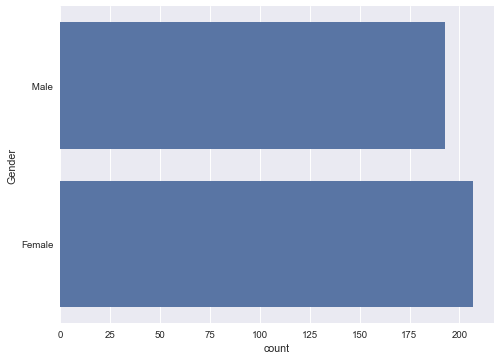

Student
  Student  Limit     Balance
0      No    360  480.369444
1     Yes     40  876.825000


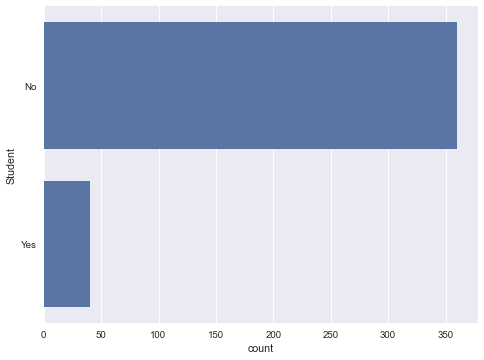

Married
  Married  Limit     Balance
0      No    155  523.290323
1     Yes    245  517.942857


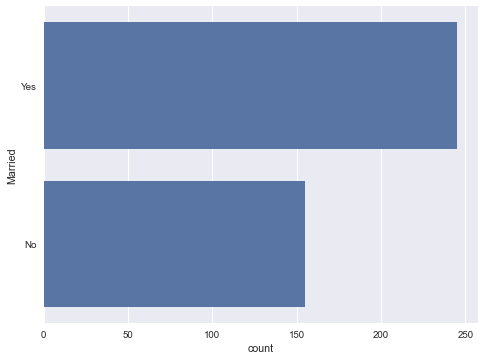

Ethnicity
          Ethnicity  Limit     Balance
0  African American     99  531.000000
1             Asian    102  512.313725
2         Caucasian    199  518.497487


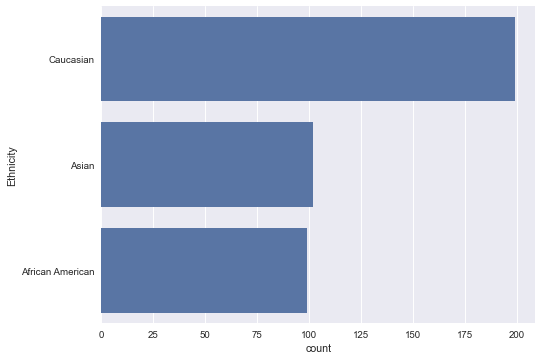

In [7]:
categorical_columns = ['Gender', 'Student', 'Married', 'Ethnicity']
var_obj = 'Balance'
for v in categorical_columns:
    print(v)
    g = df.groupby(v).agg({'Limit':'count', var_obj:'mean'}).reset_index()
    print(g)
    sns.countplot(df[v])
    plt.show()

### **`Desafío 1: Generar variables binarias`**

Siguiendo las buenas prácticas, genere variables binarias para capturar el efecto del grupo minoritario en cada variable. Para el caso de Ethnicity, genere binarias para African American, Caucasian y Asian

Podemos hacerlo con **`replace()`**

In [8]:
df['Male'] = df['Gender'].replace(['Male', 'Female'],[1, 0])
df['Student'] = df['Student'].replace(['Yes', 'No'],[1, 0])
df['Married'] = df['Married'].replace(['Yes', 'No'],[1, 0])
# Y para lo demás utilizar np.where
df['Ethnicity_Asian'] = np.where(df['Ethnicity'] == 'Asian', 1, 0)
df['Ethnicity_African_American'] = np.where(df['Ethnicity'] == 'African American', 1, 0)
df['Ethnicity_Caucasian'] = np.where(df['Ethnicity'] == 'Caucasian', 1, 0)

Podemos hacerlo con **`np.where()`**

In [9]:
df['Gender'] = np.where(df['Gender'] == ' Male', 1, 0)
df['Student'] = np.where(df['Student'] == 'Yes', 1, 0)
df['Married'] = np.where(df['Married'] == 'No', 1, 0)
df['Ethnicity_Asian'] = np.where(df['Ethnicity'] == 'Asian', 1, 0)
df['Ethnicity_African_American'] = np.where(df['Ethnicity'] == 'African American', 1, 0)
df['Ethnicity_Caucasian'] = np.where(df['Ethnicity'] == 'Caucasian', 1, 0)

Podemos hacerlo con **`pd.get_dummies()`**

In [16]:
df_dummies = pd.get_dummies(df, columns=['Gender', 'Student', 'Married', 'Ethnicity'], dummy_na=True, prefix='', prefix_sep='', drop_first=False)
df_dummies

,Income,Limit,Rating,Cards,Age,Education,Balance,Male,Female,nan,No,Yes,nan,No,Yes,nan,African American,Asian,Caucasian,nan
1,14.891,3606,283,2,34,11,333,1,0,0,1,0,0,0,1,0,0,0,1,0
2,106.025,6645,483,3,82,15,903,0,1,0,0,1,0,0,1,0,0,1,0,0
3,104.593,7075,514,4,71,11,580,1,0,0,1,0,0,1,0,0,0,1,0,0
4,148.924,9504,681,3,36,11,964,0,1,0,1,0,0,1,0,0,0,1,0,0
5,55.882,4897,357,2,68,16,331,1,0,0,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,12.096,4100,307,3,32,13,560,1,0,0,1,0,0,0,1,0,0,0,1,0
397,13.364,3838,296,5,65,17,480,1,0,0,1,0,0,1,0,0,1,0,0,0
398,57.872,4171,321,5,67,12,138,0,1,0,1,0,0,0,1,0,0,0,1,0
399,37.728,2525,192,1,44,13,0,1,0,0,1,0,0,0,1,0,0,0,1,0


Si aplicamos el paramatro **`drop_first=True`** se elimina la primera columna (columna de la izquierda) para todas las variables categoricas

In [34]:
df_dummies_a = pd.get_dummies(df, columns=['Gender', 'Student', 'Married', 'Ethnicity'], dummy_na=False, prefix=None, prefix_sep='_', drop_first=True)
df_dummies_a

,Income,Limit,Rating,Cards,Age,Education,Balance,Gender_Female,Student_Yes,Married_Yes,Ethnicity_Asian,Ethnicity_Caucasian
1,14.891,3606,283,2,34,11,333,0,0,1,0,1
2,106.025,6645,483,3,82,15,903,1,1,1,1,0
3,104.593,7075,514,4,71,11,580,0,0,0,1,0
4,148.924,9504,681,3,36,11,964,1,0,0,1,0
5,55.882,4897,357,2,68,16,331,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
396,12.096,4100,307,3,32,13,560,0,0,1,0,1
397,13.364,3838,296,5,65,17,480,0,0,0,0,0
398,57.872,4171,321,5,67,12,138,1,0,1,0,1
399,37.728,2525,192,1,44,13,0,0,0,1,0,1


Si aplicamos el paramatro **`drop_first=False`** se mantiene la primera columna (columna de la izquierda) para todas las variables categoricas

In [36]:
df_dummies_b = pd.get_dummies(df, columns=['Gender', 'Student', 'Married', 'Ethnicity'], dummy_na=False, prefix=None, prefix_sep='_', drop_first=False)
df_dummies_b

,Income,Limit,Rating,Cards,Age,Education,Balance,Gender_ Male,Gender_Female,Student_No,Student_Yes,Married_No,Married_Yes,Ethnicity_African American,Ethnicity_Asian,Ethnicity_Caucasian
1,14.891,3606,283,2,34,11,333,1,0,1,0,0,1,0,0,1
2,106.025,6645,483,3,82,15,903,0,1,0,1,0,1,0,1,0
3,104.593,7075,514,4,71,11,580,1,0,1,0,1,0,0,1,0
4,148.924,9504,681,3,36,11,964,0,1,1,0,1,0,0,1,0
5,55.882,4897,357,2,68,16,331,1,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,12.096,4100,307,3,32,13,560,1,0,1,0,0,1,0,0,1
397,13.364,3838,296,5,65,17,480,1,0,1,0,1,0,1,0,0
398,57.872,4171,321,5,67,12,138,0,1,1,0,0,1,0,0,1
399,37.728,2525,192,1,44,13,0,1,0,1,0,0,1,0,0,1


### **`Desafío 2: Genere gráficos descriptivos para las variables contínuas`**

- Genere una función llamada plot_hist que genere un histograma de la variable e indique la media y mediana de la misma. 
- Agrege una legenda para indicar qué representa cada línea.
- ¿Cuál es el comportamiento de Balance , Income , Cards y Rating ?

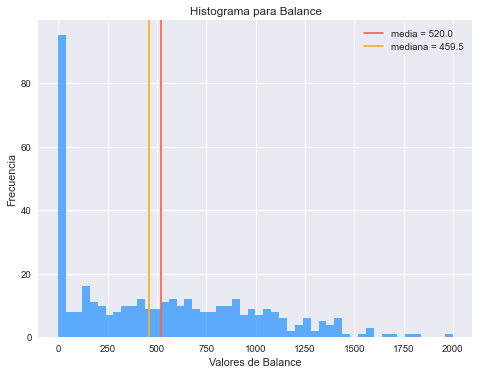

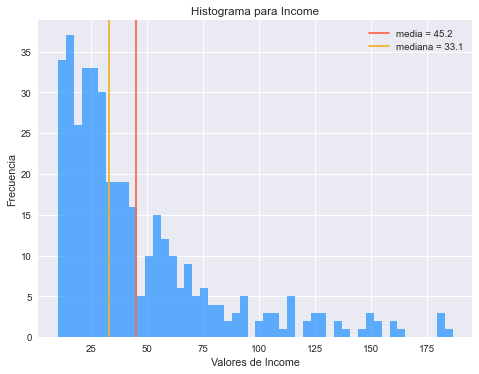

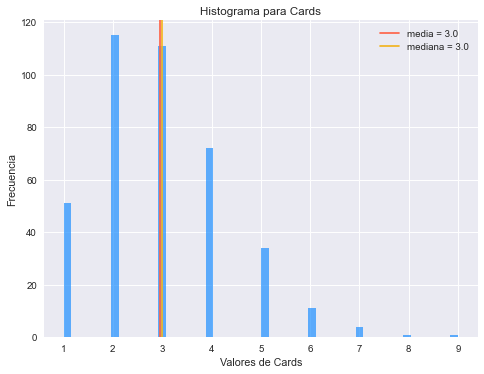

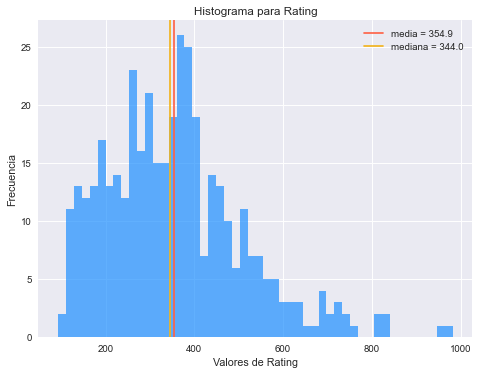

In [20]:
def plot_hist(df, variable, bins=100):
    tmp_mean = np.mean(df[variable])
    tmp_median = np.median(df[variable])
    plt.hist(df[variable], color='dodgerblue', alpha=0.7, bins=bins)
    plt.axvline(tmp_mean, color='tomato', label = f"media = {round(tmp_mean,1)}")
    plt.axvline(tmp_median, color='#f2b41e', label = f"mediana = {round(tmp_median,1)}")
    plt.title(f"Histograma para {variable}")
    plt.xlabel(f"Valores de {variable}")
    plt.ylabel("Frecuencia")
    plt.legend()
    plt.show()

for i in ['Balance', 'Income', 'Cards' , 'Rating']:
    plot_hist(df,i, bins=50)

__COMENTARIOS__

__Balance:__ </font><br> 
* _El gráfico muestra que la mayor parte de los usuarios tienen una deuda baja cercana a 0, la deuda promedio está cercana a los USD500.000,  y la minoria de los usuarios tienen las deudas más altas, por sobre los USD 1000.000._

__Income:__</font><br>
* _El gráfico muestra que la mayoria de los usuarios tienen Ingresos anuales disponibles cercanos a los UDS25.000, el promedio global ronda los USD50.000, y los ingresos anuales mas altos entre USD125.000 y USD175.000 se concentran en la menor parte de los usuarios_. Cabe destacar también que dentro de las series analizadas es la que mayor diferencia existe entre la media y la mediana, en este caso particular la media > mediana lo cual indica que hay valores grandes que en cierta forma distorsionan esta medida.

__Cards:__ </font><br>
* _Podemos observar que la mayoría de los usuarios tienen entre 2 a 3 tarjetas de crédito, el promedio global de tarjetas es de 3, y la menor parte de los usuarios tiene sobre 5 tarjetas._

__Rating:__ </font><br>
* _Podemos ver que el promedio de Ranking del crédito es cercanos a los 300, la mayoria de los usuarios tienen un Rating entre 300 y 500._

### **`Desafío 3: Regresión Lineal Simple`**

A continuación generaremos una serie de modelos simples:

$$ Balance =  \beta_{0} + \omega_{1} \times Student + \epsilon $$
    
$$ Balance =  \beta_{0} + \beta_{1} \times Income + \epsilon $$
        
$$ Balance =  \beta_{0} + \beta_{1} \times Rating + \epsilon $$
        
- Utilizando `statsmodels`, comente brevemente los siguientes puntos:
    - ¿Qué variable presenta un mayor poder explicativo de la variabilidad de `Balance`?
    - ¿Qué podemos decir sobre el comportamiento de `Student`?
    - ¿Qué pasa si aplicamos una prueba de hipótesis para muestras independientes de `Balance` entre aquellos que son y no son estudiantes?

Para **Student**:

`Primera forma:`

In [37]:
model_student = smf.ols('Balance ~ Student_Yes', df_dummies_a).fit()

In [38]:
model_student.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     28.62
Date:                Fri, 29 Dec 2023   Prob (F-statistic):           1.49e-07
Time:                        11:11:17   Log-Likelihood:                -3005.5
No. Observations:                 400   AIC:                             6015.
Df Residuals:                     398   BIC:                             6023.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     480.3694     23.434     20.499      0.000     434.300     526.439
Student_Yes   396.4556     74.104      5.350      0.000     250.771     542.140
==============================================================================
Omnibus:                       20.866   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.920
Skew:                           0.544   Prob(JB):                     1.74e-05
Kurtosis:                       2.637   Cond. No.                         3.37
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

`Segunda forma:`

O podriamos utilizar directamente el dataframe **`df`** (dataframe sin columnas binarias) y al utilizar `summary()` se calculará de manera automática y se eliminará la primera columna (`drop_first=True`) y utilizará la columna `Student_Yes`.

In [23]:
model_student = smf.ols('Balance ~ Student', df).fit()

In [24]:
model_student.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     28.62
Date:                Fri, 29 Dec 2023   Prob (F-statistic):           1.49e-07
Time:                        08:42:59   Log-Likelihood:                -3005.5
No. Observations:                 400   AIC:                             6015.
Df Residuals:                     398   BIC:                             6023.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        480.3694     23.434     20.499      0.000     434.300     526.439
Student[T.Yes]   396.4556     74.104      5.350      0.000     250.771     542.140
==============================================================================
Omnibus:                       20.866   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.920
Skew:                           0.544   Prob(JB):                     1.74e-05
Kurtosis:                       2.637   Cond. No.                         3.37
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Para **Income**:

In [25]:
model_income = smf.ols('Balance ~ Income', df).fit()

In [26]:
model_income.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.213
Method:                 Least Squares   F-statistic:                     109.0
Date:                Fri, 29 Dec 2023   Prob (F-statistic):           1.03e-22
Time:                        08:42:59   Log-Likelihood:                -2970.9
No. Observations:                 400   AIC:                             5946.
Df Residuals:                     398   BIC:                             5954.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    246.5148     33.199      7.425      0.000     181.247     311.783
Income         6.0484      0.579     10.440      0.000       4.909       7.187
==============================================================================
Omnibus:                       42.505   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.975
Skew:                           0.384   Prob(JB):                     2.79e-05
Kurtosis:                       2.182   Cond. No.                         93.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Para **Rating**:

In [27]:
model_rating = smf.ols('Balance ~ Rating', df).fit()

In [28]:
model_rating.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     1168.
Date:                Fri, 29 Dec 2023   Prob (F-statistic):          1.90e-120
Time:                        08:42:59   Log-Likelihood:                -2745.4
No. Observations:                 400   AIC:                             5495.
Df Residuals:                     398   BIC:                             5503.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -390.8463     29.069    -13.446      0.000    -447.993    -333.699
Rating         2.5662      0.075     34.176      0.000       2.419       2.714
==============================================================================
Omnibus:                       23.223   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.802
Skew:                           0.390   Prob(JB):                     3.75e-09
Kurtosis:                       4.311   Cond. No.                         970.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

`¿Qué variable presenta un mayor poder explicativo de la variabilidad de Balance?`


**RESPUESTA**

La variable más explicativa de las tres es `RATING`, dado que tiene el r cuadrado más alto de los 3 modelos que intentan modelar Balance (rcuadrado = 0.838)

`¿Qué podemos decir sobre el comportamiento de Student?`

`¿Qué pasa si aplicamos una prueba de hipotesis para muestras independientes de Balance entre aquellos que son y no son estudiantes?`

Primera forma:

In [41]:
student = df_dummies_b[df_dummies_b['Student_Yes'] == 1].Balance
student


2       903
10     1350
27      654
36      419
42     1155
47     1241
48      797
50      902
77      532
97     1380
99      375
102     431
103    1587
127    1404
129    1259
131     868
141    1425
153     156
158    1020
192    1687
204    1411
208    1216
219     195
221    1246
223    1549
243      16
249       0
250      98
262    1050
273     728
274    1255
280     269
311    1036
321       5
325     415
331    1054
366     790
373     840
374    1003
383    1352
Name: Balance, dtype: int64

In [42]:
no_student = df_dummies_b[df_dummies_b['Student_No'] == 1].Balance
no_student

1       333
3       580
4       964
5       331
6      1151
       ... 
396     560
397     480
398     138
399       0
400     966
Name: Balance, Length: 360, dtype: int64

In [31]:
stats.ttest_ind(student, no_student)

TtestResult(statistic=5.3499641230750035, pvalue=1.4877341077322994e-07, df=398.0)

Segunda forma:

In [32]:
no_student = df.loc[df.Student=='No'].Balance
student = df.loc[df.Student=='Yes'].Balance

In [33]:
stats.ttest_ind(student, no_student)

TtestResult(statistic=5.3499641230750035, pvalue=1.4877341077322994e-07, df=398.0)

__RESPUESTAS__

__MAYOR PODER EXPLICATIVO__</font><br>

* _La Variable que presenta un mayor poder explicativo para la variabilidad de Balance es Rating ya que su R-squared es de 0.746_


__COMPORTAMIENTO DE STUDENT__ </font><br>

* _Podemos decir que la variable Student tiene un poder explicativo bajo, de tan solo del 0.067_

__PRUEBA DE HIPÓTESIS__</font><br>

$$ H_0 : \text{media de la variable 'Balance' para los QUE SI SON ESTUDIANTES = media de la variable 'Balance' para los QUE NO SON ESTUDIANTES} $$ 
$$ H_1 : \text{Las medias son diferentes}$$ 



* _En base al resultado de test de muestras independientes, se ve que las medias son claramente DISTINTAS, por tanto, rechazamos la hipotesis nula. La variable student diferencia entre balances de estudiantes y balances de NO estudiantes._

### **`Desafío 4: Generar un modelo que incluya todos los regresores`**

A partir de la siguiente fórmula, genere el modelo que incluya dichos regresores y comente brevemente sobre el poder explicativo en la varianza de características de los predictores.

$$ Balance_i =  \beta_{0} + \sum_{j=1}^N \beta_1  \times  X_{ij}+ \epsilon_{i} $$

Primero vamos a revisar las correlaciones entre variables:

In [44]:
cor = df_dummies_a.corr().round(2)
cor

,Income,Limit,Rating,Cards,Age,Education,Balance,Gender_Female,Student_Yes,Married_Yes,Ethnicity_Asian,Ethnicity_Caucasian
Income,1.00,0.79,0.79,-0.02,0.18,-0.03,0.46,-0.01,0.02,0.04,-0.02,-0.02
Limit,0.79,1.00,1.00,0.01,0.10,-0.02,0.86,0.01,-0.01,0.03,-0.03,-0.00
Rating,0.79,1.00,1.00,0.05,0.10,-0.03,0.86,0.01,-0.00,0.04,-0.04,-0.00
Cards,-0.02,0.01,0.05,1.00,0.04,-0.05,0.09,-0.02,-0.03,-0.01,0.01,-0.01
Age,0.18,0.10,0.10,0.04,1.00,0.00,0.00,0.00,-0.03,-0.07,-0.06,-0.00
Education,-0.03,-0.02,-0.03,-0.05,0.00,1.00,-0.01,-0.01,0.07,0.05,0.03,-0.04
Balance,0.46,0.86,0.86,0.09,0.00,-0.01,1.00,0.02,0.26,-0.01,-0.01,-0.00
Gender_Female,-0.01,0.01,0.01,-0.02,0.00,-0.01,0.02,1.00,0.06,0.01,0.03,-0.01
Student_Yes,0.02,-0.01,-0.00,-0.03,-0.03,0.07,0.26,0.06,1.00,-0.08,0.05,-0.05
Married_Yes,0.04,0.03,0.04,-0.01,-0.07,0.05,-0.01,0.01,-0.08,1.00,0.09,0.01


<AxesSubplot:>

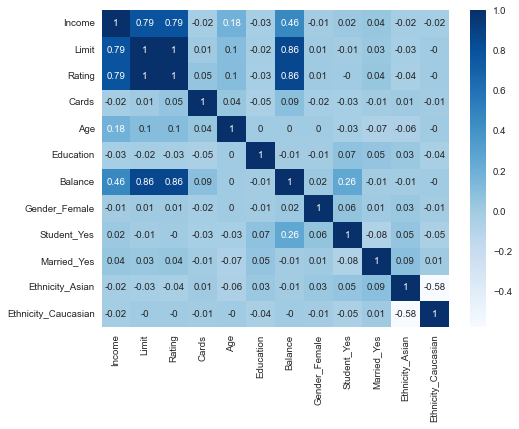

In [46]:
sns.heatmap(cor, cmap='Blues', annot=True)

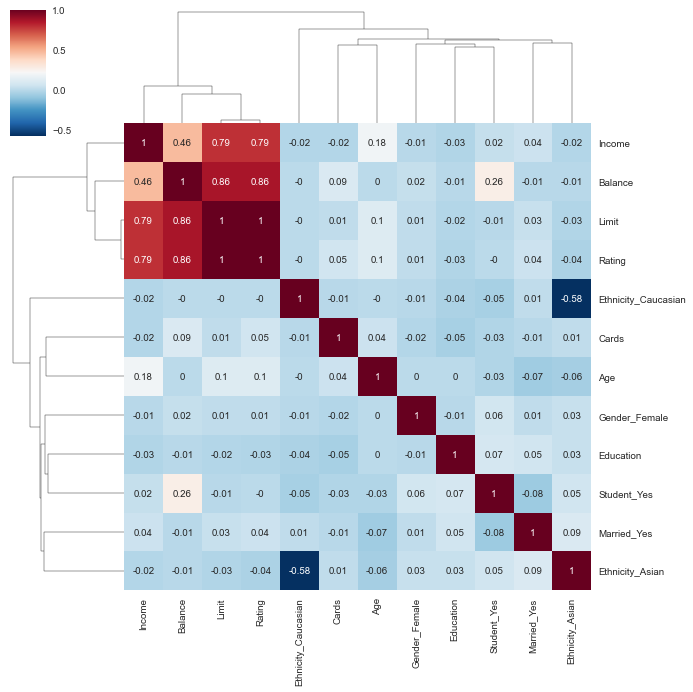

In [48]:
sns.clustermap(cor, cmap='RdBu_r', annot=True)

In [49]:
# extraemos los nombres de las columnas en la base de datos 
columns = df_dummies_a.columns

# generamos 3 arrays vacíos para guardar los valores 
# nombre de la variable
attr_name = []
# correlación de pearson 
pearson_r = []
# valor absoluto de la correlación 
abs_pearson_r = []

# para cada columna en el array de columnas
for col in columns:
    # si la columna no es la dependiente
    if col != "Balance":
    # adjuntar el nombre de la variable en attr_name 
        attr_name.append(col)
    # adjuntar la correlación de pearson 
        pearson_r.append(df_dummies_a[col].corr(df_dummies_a['Balance']))
    # adjuntar el absoluto de la correlación de pearson 
        abs_pearson_r.append(abs(df_dummies_a[col].corr(df_dummies_a['Balance'])))

# transformamos los arrays en un DataFrame 
features = pd.DataFrame({
    'attribute': attr_name, 
    'corr':pearson_r, 
    'abs_corr':abs_pearson_r
})

# generamos el index con los nombres de las variables 
features = features.set_index('attribute')

# ordenamos los valores de forma descendiente 
features.sort_values(by=['abs_corr'], ascending=False)

,corr,abs_corr
attribute,,
Rating,0.863625,0.863625
Limit,0.861697,0.861697
Income,0.463656,0.463656
Student_Yes,0.259018,0.259018
Cards,0.086456,0.086456
Gender_Female,0.021474,0.021474
Ethnicity_Asian,-0.009812,0.009812
Education,-0.008062,0.008062
Married_Yes,-0.005673,0.005673


Primera forma:

In [50]:
#Se genera un modelo incluyendo todos los regresores.
model_1 = smf.ols('Balance ~ Income + Limit + Rating + Cards + Age + Education + Gender + Student + Married + Ethnicity', df).fit()

In [51]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     750.3
Date:                Fri, 29 Dec 2023   Prob (F-statistic):          1.11e-253
Time:                        11:56:57   Log-Likelihood:                -2398.7
No. Observations:                 400   AIC:                             4821.
Df Residuals:                     388   BIC:                             4869.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               -479.2079     35.774    -13.395      0.000    -549.543    -408.873
Gender[T.Female]         -10.6532      9.914     -1.075      0.283     -30.145       8.839
Student[T.Yes]           425.7474     16.723     25.459      0.000     392.869     458.626
Married[T.Yes]            -8.5339     10.363     -0.824      0.411     -28.908      11.841
Ethnicity[T.Asian]        16.8042     14.119      1.190      0.235     -10.955      44.564
Ethnicity[T.Caucasian]    10.1070     12.210      0.828      0.408     -13.899      34.113
Income                    -7.8031      0.234    -33.314      0.000      -8.264      -7.343
Limit                      0.1909      0.033      5.824      0.000       0.126       0.255
Rating                     1.1365      0.491      2.315      0.021       0.171       2.102
Cards                     17.7245      4.341      4.083      0.000       9.190      26.259
Age                       -0.6139      0.294     -2.088      0.037      -1.192      -0.036
Education                 -1.0989      1.598     -0.688      0.492      -4.241       2.043
==============================================================================
Omnibus:                       34.899   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.766
Skew:                           0.782   Prob(JB):                     8.52e-10
Kurtosis:                       3.241   Cond. No.                     3.87e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.87e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Segunda forma:

In [52]:
#Se genera un modelo incluyendo todos los regresores.
model_1 = smf.ols('Balance ~ Income + Limit + Rating + Cards + Age + Education + Gender_Female + Student_Yes + Married_Yes + Ethnicity_Asian + Ethnicity_Caucasian', df_dummies_a).fit()

In [53]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     750.3
Date:                Fri, 29 Dec 2023   Prob (F-statistic):          1.11e-253
Time:                        12:08:20   Log-Likelihood:                -2398.7
No. Observations:                 400   AIC:                             4821.
Df Residuals:                     388   BIC:                             4869.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            -479.2079     35.774    -13.395      0.000    -549.543    -408.873
Income                 -7.8031      0.234    -33.314      0.000      -8.264      -7.343
Limit                   0.1909      0.033      5.824      0.000       0.126       0.255
Rating                  1.1365      0.491      2.315      0.021       0.171       2.102
Cards                  17.7245      4.341      4.083      0.000       9.190      26.259
Age                    -0.6139      0.294     -2.088      0.037      -1.192      -0.036
Education              -1.0989      1.598     -0.688      0.492      -4.241       2.043
Gender_Female         -10.6532      9.914     -1.075      0.283     -30.145       8.839
Student_Yes           425.7474     16.723     25.459      0.000     392.869     458.626
Married_Yes            -8.5339     10.363     -0.824      0.411     -28.908      11.841
Ethnicity_Asian        16.8042     14.119      1.190      0.235     -10.955      44.564
Ethnicity_Caucasian    10.1070     12.210      0.828      0.408     -13.899      34.113
==============================================================================
Omnibus:                       34.899   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.766
Skew:                           0.782   Prob(JB):                     8.52e-10
Kurtosis:                       3.241   Cond. No.                     3.87e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.87e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

__COMENTARIOS__</font><br>
* _Considerando un modelo que incluye todos los regresores, poder ver que dicho modelo tiene un poder explicativo de 0.95 en la varianza._</font><br>


__Intercept:__ 
</font><br>
* _El modelo nos sugiere que un individuo en la muestra con USD $0 ingreso anual disponible (Income), tendra en promedio una deuda negativa de -479.208, considerando que no es posible tener un promedio de deuda negativa, hay que dejar en claro que el intercepto solo tiene sentido en el contexto del modelo._</font><br>

__Student_Yes__
</font><br>
* _El modelo nos sugiere que la diferencia en el promedio de deuda entre un individuo que tiene estudios de uno que no los tiene es de 425.74._</font><br>

__Rating__ 
</font><br>
* _Por su parte el modelo nos sugiere que existe una diferencia de 1.136 en ranking del credito (Rating) cuando hay una variacion de X miles de dolares (Income) entre un individuo y otro._</font><br>
* _También nos sugiere que por cada 1 unidad de aumento en el Rating (rating de crédito) existirá un aumento en el promedio de deuda de 1.136._</font><br>

### **`Desafío 5: Depure el modelo e incluya sólo los predictores significativos`**

* En base al modelo anterior, refactorize e incluya sólo las variables con un nivel de significancia `p - value < = 0.025`. Comente brevemente sobre el poder explicativo en la varianza de `y` y las principales características de los predictores. 
* ¿Mejoró o empeoró el modelo con la reducción de regresores?

In [58]:
#Se genera un modelo solo con los predictores significativos, p - value < = 0.025)
model_predictores_significativos= smf.ols('Balance ~ Income + Limit + Rating + Cards + Age + Student', data=df).fit()
model_predictores_significativos.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     1380.
Date:                Fri, 29 Dec 2023   Prob (F-statistic):          1.58e-260
Time:                        12:35:02   Log-Likelihood:                -2400.5
No. Observations:                 400   AIC:                             4815.
Df Residuals:                     393   BIC:                             4843.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       -493.7342     24.825    -19.889      0.000    -542.540    -444.928
Student[T.Yes]   425.6099     16.510     25.780      0.000     393.152     458.068
Income            -7.7951      0.233    -33.395      0.000      -8.254      -7.336
Limit              0.1937      0.032      5.981      0.000       0.130       0.257
Rating             1.0912      0.485      2.251      0.025       0.138       2.044
Cards             18.2119      4.319      4.217      0.000       9.721      26.702
Age               -0.6241      0.292     -2.139      0.033      -1.198      -0.050
==============================================================================
Omnibus:                       34.091   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.623
Skew:                           0.772   Prob(JB):                     1.51e-09
Kurtosis:                       3.225   Cond. No.                     2.66e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.66e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

__COMENTARIOS__</font><br>
* _No hubo mayor cambio, no cambió el r cuadrado dado que sacamos variables que no eran significativas, no explicaban la variabilidad. No nos permitia rechazar la Hipótesis nula, es decir, que la media de sus variables era distinto de 0._</font><br>

### **`Desafío 6: Utilizando lmplot de seaborn , inspeccione el comportamiento de los tres principales determinantes`**

Existe una relación positiva. A medida que aumenta los ingresos tambien lo hace el promedio de la deuda. Aunque se aprecia que existe una gran dispersión de los datos.

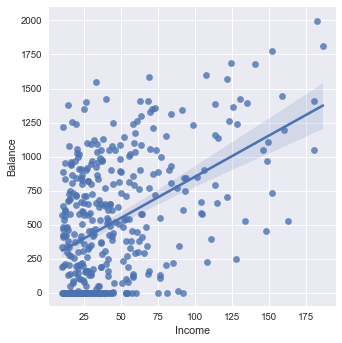

In [59]:
comportamiento1 = sns.lmplot(x="Income", y="Balance", data= df) 

Existe una relación positiva. A medida que aumenta el limite de crédito tambien lo hace el promedio de la deuda.A diferencia de la variable analizada anteriormente existe una menor dispersión.

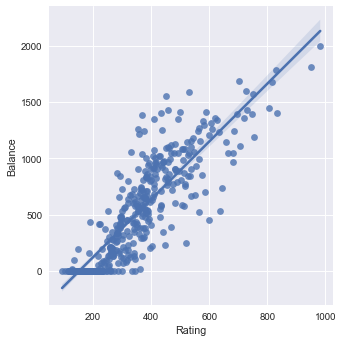

In [60]:
comportamiento2 = sns.lmplot(x="Rating", y="Balance", data= df) 

Existe una relación positiva. A medida que aumenta el raiting tambien lo hace el promedio de la deuda.

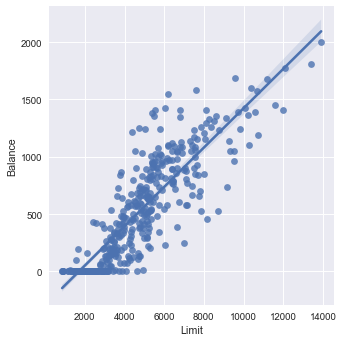

In [61]:
comportamiento2 = sns.lmplot(x="Limit", y="Balance", data= df) 